In [13]:
import numpy as np 
import pandas as pd 
import matplotlib.pyplot as plt
import seaborn as sns
import matplotlib.pyplot as plt
from wordcloud import WordCloud, STOPWORDS, ImageColorGenerator
from collections import Counter

In [2]:
df = pd.read_csv('netflix_titles.csv')

In [3]:
df.head(10)

,show_id,type,title,director,cast,country,date_added,release_year,rating,duration,listed_in,description
0,s1,TV Show,3%,NaN,"João Miguel, Bianca Comparato, Michel Gomes, R...",Brazil,"August 14, 2020",2020,TV-MA,4 Seasons,"International TV Shows, TV Dramas, TV Sci-Fi &...",In a future where the elite inhabit an island ...
1,s2,Movie,7:19,Jorge Michel Grau,"Demián Bichir, Héctor Bonilla, Oscar Serrano, ...",Mexico,"December 23, 2016",2016,TV-MA,93 min,"Dramas, International Movies",After a devastating earthquake hits Mexico Cit...
2,s3,Movie,23:59,Gilbert Chan,"Tedd Chan, Stella Chung, Henley Hii, Lawrence ...",Singapore,"December 20, 2018",2011,R,78 min,"Horror Movies, International Movies","When an army recruit is found dead, his fellow..."
3,s4,Movie,9,Shane Acker,"Elijah Wood, John C. Reilly, Jennifer Connelly...",United States,"November 16, 2017",2009,PG-13,80 min,"Action & Adventure, Independent Movies, Sci-Fi...","In a postapocalyptic world, rag-doll robots hi..."
4,s5,Movie,21,Robert Luketic,"Jim Sturgess, Kevin Spacey, Kate Bosworth, Aar...",United States,"January 1, 2020",2008,PG-13,123 min,Dramas,A brilliant group of students become card-coun...
5,s6,TV Show,46,Serdar Akar,"Erdal Beşikçioğlu, Yasemin Allen, Melis Birkan...",Turkey,"July 1, 2017",2016,TV-MA,1 Season,"International TV Shows, TV Dramas, TV Mysteries",A genetics professor experiments with a treatm...
6,s7,Movie,122,Yasir Al Yasiri,"Amina Khalil, Ahmed Dawood, Tarek Lotfy, Ahmed...",Egypt,"June 1, 2020",2019,TV-MA,95 min,"Horror Movies, International Movies","After an awful accident, a couple admitted to ..."
7,s8,Movie,187,Kevin Reynolds,"Samuel L. Jackson, John Heard, Kelly Rowan, Cl...",United States,"November 1, 2019",1997,R,119 min,Dramas,After one of his high school students attacks ...
8,s9,Movie,706,Shravan Kumar,"Divya Dutta, Atul Kulkarni, Mohan Agashe, Anup...",India,"April 1, 2019",2019,TV-14,118 min,"Horror Movies, International Movies","When a doctor goes missing, his psychiatrist w..."
9,s10,Movie,1920,Vikram Bhatt,"Rajneesh Duggal, Adah Sharma, Indraneil Sengup...",India,"December 15, 2017",2008,TV-MA,143 min,"Horror Movies, International Movies, Thrillers",An architect and his wife move into a castle t...


In [4]:
df.isnull().sum()

show_id            0
type               0
title              0
director        2389
cast             718
country          507
date_added        10
release_year       0
rating             7
duration           0
listed_in          0
description        0
dtype: int64

In [19]:
df=df.drop_duplicates(['title','country','type','release_year'])

In [20]:
df=df.drop('show_id',axis=1)

In [21]:
df['rating']=df['rating'].fillna(df['rating'].mode()[0])

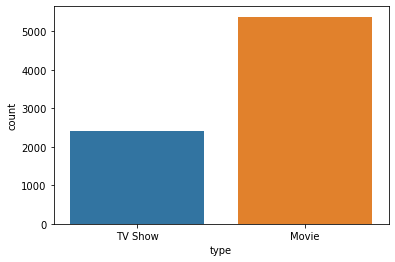

In [5]:
pt = sns.countplot(x='type', data = df)

In [26]:
## there are more movies than series on Netflix.

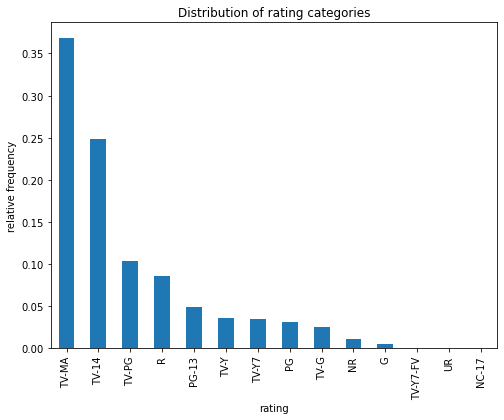

In [28]:
plt.figure(figsize=(8,6))
df['rating'].value_counts(normalize=True).plot.bar()
plt.title('Distribution of rating categories')
plt.xlabel('rating')
plt.ylabel('relative frequency')
plt.show()

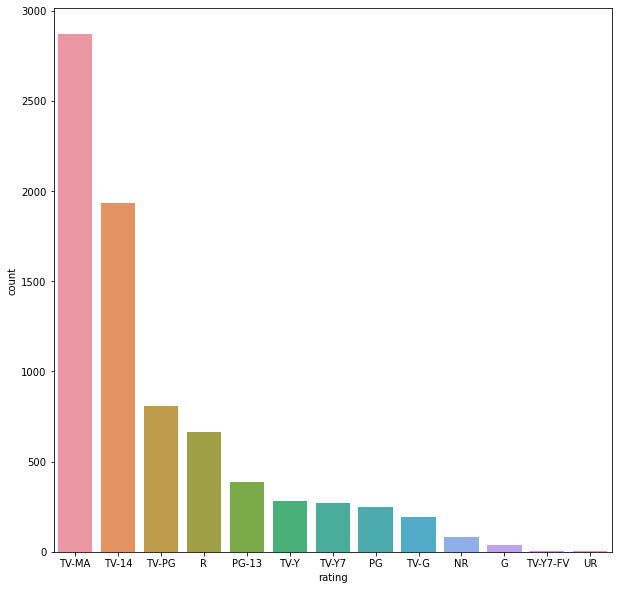

In [29]:
plt.figure(figsize=(10,10))
rating = sns.countplot(x='rating', data=df,order = df['rating'].value_counts().index[0:-1])

In [ ]:
## There are more than 2500 movies with TV-MA rating, 'TV-MA' rating is suitable only for the mature audiences assigned by    the the TV Parental Guidelines. Second highest rating is the TV-14 with slightly less than 2000 movies, which says that the content is not appropriate for children younger than 14 years

In [10]:
countcountries = df['country'].value_counts().sort_values(ascending=False)
countcountries = pd.DataFrame(countcountries)
countcountries.head()
top10 = countcountries[0:10]


In [11]:
top10

,country
United States,2555
India,923
United Kingdom,397
Japan,226
South Korea,183
Canada,177
Spain,134
France,115
Egypt,101
Mexico,100


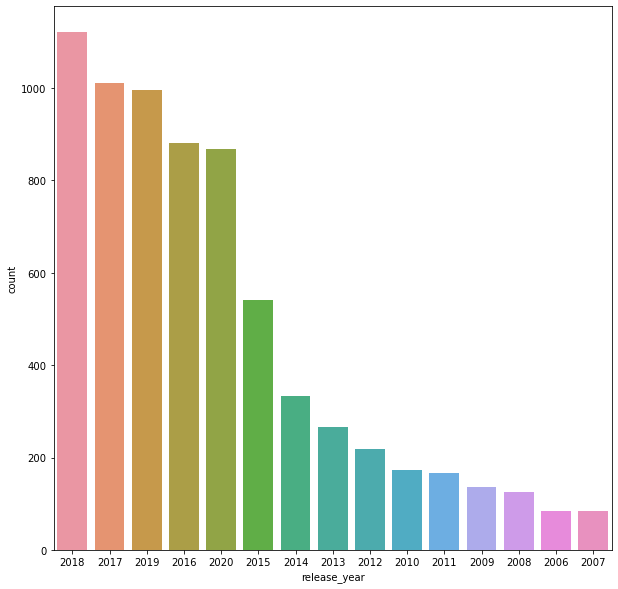

In [12]:
plt.figure(figsize=(10,10))
yer = sns.countplot(x='release_year',data=df, order=df['release_year'].value_counts().index[0:15])

In [ ]:
# 2018 was the year with most number of releases

In [14]:
genre = list(df['listed_in'])
gen=[]
for i in genre:
    i = list(i.split(','))
    for j in i:
        gen.append(j.replace(' ', ""))
g = Counter(gen)

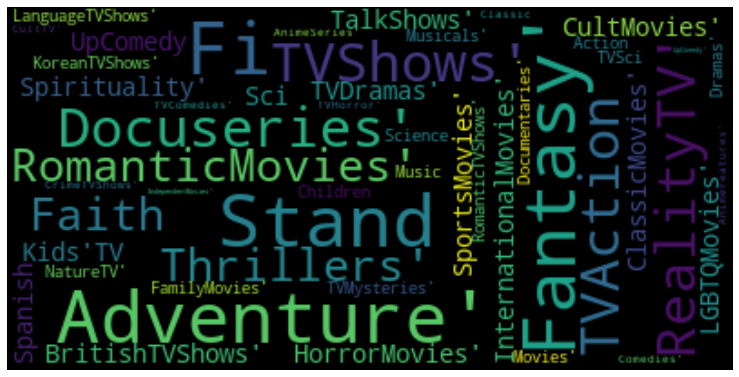

In [15]:
plt.rcParams['figure.figsize']=(13,13)
text = list(set(gen))
wordcloud = WordCloud(max_font_size=40,max_words=50).generate(str(text))
plt.imshow(wordcloud,interpolation='bilinear')
plt.axis('off')
plt.show()

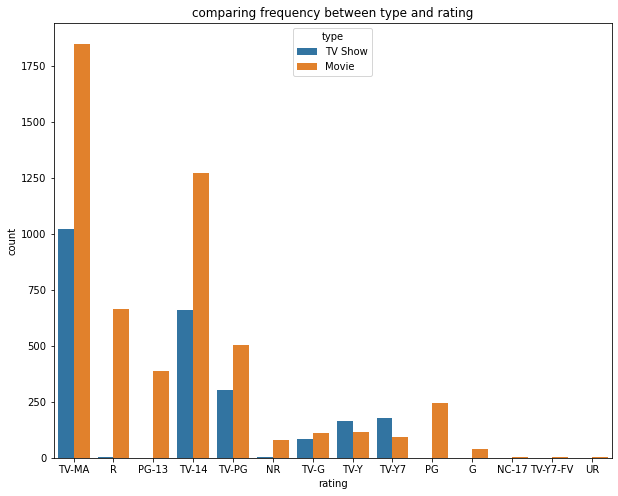

In [22]:
plt.figure(figsize=(10,8))
sns.countplot(x='rating',hue='type',data=df)
plt.title('comparing frequency between type and rating')
plt.show()

In [ ]:
## We can say that Movies is the majority category in every rating category on Netflix

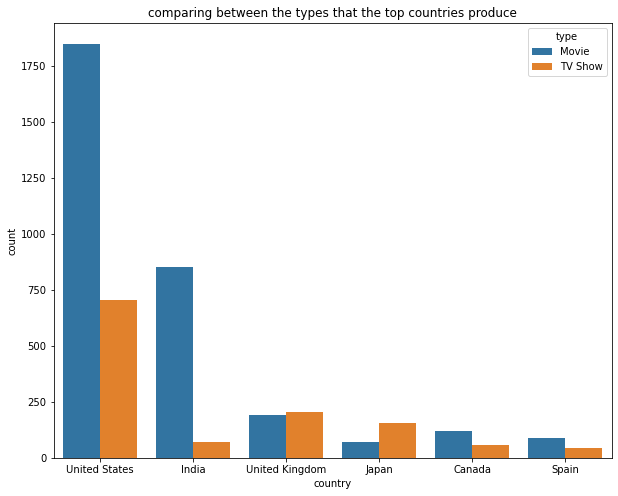

In [23]:
top_productive_countries=df[(df['country']=='United States')|(df['country']=='India')|(df['country']=='United Kingdom')|(df['country']=='Japan')|
                             (df['country']=='Canada')|(df['country']=='Spain')]
plt.figure(figsize=(10,8))
sns.countplot(x='country',hue='type',data=top_productive_countries)
plt.title('comparing between the types that the top countries produce')
plt.show()

In [ ]:
## UK and Japan produces TV-Shows more than Movies

In [ ]:
EDA Insights:

1. there are more movies than series on Netflix
2. here are more than 2500 movies with TV-MA rating, 'TV-MA' rating is suitable only for the mature audiences assigned by    the the TV Parental Guidelines. Second highest rating is the TV-14 with slightly less than 2000 movies, which says that the content is not appropriate for children younger than 14 years
3.2018 was the year with most number of releases
4. UK and Japan produces TV-Shows more than Movies